In [39]:
import tensorflow as tf

In [40]:
from tensorflow import keras

In [41]:
import pandas as pd

In [42]:
testdata = pd.read_csv('./datasets/test/_annotations.csv')
traindata = pd.read_csv('./datasets/train/_annotations.csv')
validdata = pd.read_csv('./datasets/valid/_annotations.csv')

In [43]:
traindata

filename  width  ...  xmax ymax
0     zoom_tests_RockPaperScissors-mohamed_mp4-67_jp...    640  ...   141  250
1     egohands-public-1625070649053_png_jpg.rf.000a5...    640  ...   485  637
2     zoom_tests_RockPaperScissors-mohamed_mp4-111_j...    640  ...   233  640
3     IMG_5636_MOV-61_jpg.rf.003476f680b71b74f3764a1...    640  ...   175  467
4     IMG_5636_MOV-61_jpg.rf.003476f680b71b74f3764a1...    640  ...   556  452
...                                                 ...    ...  ...   ...  ...
7816  IMG_5567_mp4-163_jpg.rf.c7c964e5f3334f60c8f6f6...    640  ...   623  430
7817  Screen-Shot-2022-02-08-at-1-00-58-PM_png.rf.c7...    640  ...   640  477
7818  IMG_5567_mp4-89_jpg.rf.c7b9f669eca26311965b115...    640  ...   435  519
7819  IMG_7043_MOV-176_jpg.rf.c7cc43070427a0b1b23af9...    640  ...   520  526
7820  egohands-public-1624035525945_png_jpg.rf.c7889...    640  ...   630  450

[7821 rows x 8 columns]

In [44]:
import cv2
import matplotlib.pyplot as plt

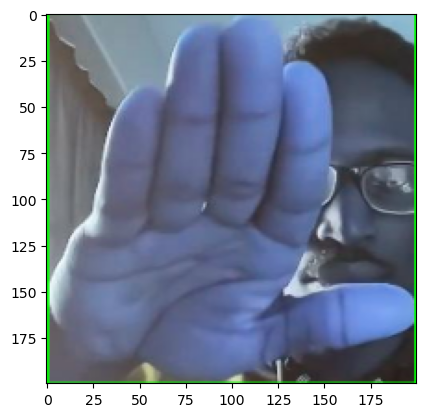

In [45]:
testimg = cv2.imread('./datasets/test/zoom_tests_RockPaperScissors-mohamed_mp4-107_jpg.rf.056c26adf21336e65bd2ff9fcfe79df9.jpg')
img = cv2.rectangle(testimg, (190,120), (419, 526) , (0,255,0), 2)
imgt2 = testimg[120:526, 190:419]
imgt2 = cv2.resize(imgt2, (200, 200))
plt.imshow(imgt2)

In [46]:
y_train = traindata['class']
y_test = testdata['class']
y_valid = validdata['class']
y_train

0           Rock
1           Rock
2          Paper
3           Rock
4          Paper
          ...   
7816       Paper
7817    Scissors
7818       Paper
7819        Rock
7820       Paper
Name: class, Length: 7821, dtype: object

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_valid = le.fit_transform(y_valid)
y_valid

array([0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2,
       0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0,
       0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2,
       0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 1,
       1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1,
       1, 2, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0,
       0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1,
       0, 2, 1, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0,
       2, 2, 1, 0, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2,
       2, 2, 1, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1,

### now testing the model to classify stone paper scissor in new image

In [48]:
def process_image(row, folder):
    image_path = './datasets/' + folder + '/' + row['filename']
    img = cv2.imread(image_path)
    img = cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (0, 255, 0), 2)
    img_cropped = img[row['ymin']:row['ymax'], row['xmin']:row['xmax']]
    img_resized = cv2.resize(img_cropped, (32, 32))
    return img_resized

In [49]:
testdf = testdata.apply(process_image, axis=1, args=("test",))

In [50]:
testdf

0      [[[97, 151, 162], [101, 142, 174], [103, 146, ...
1      [[[86, 121, 19], [109, 83, 23], [110, 84, 24],...
2      [[[185, 193, 171], [182, 193, 170], [186, 198,...
3      [[[167, 182, 181], [170, 190, 195], [187, 207,...
4      [[[81, 84, 73], [98, 87, 68], [90, 81, 62], [8...
                             ...                        
212    [[[0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 2...
213    [[[0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 2...
214    [[[212, 83, 168], [212, 83, 168], [213, 82, 16...
215    [[[116, 133, 142], [115, 132, 141], [114, 133,...
216    [[[12, 74, 25], [10, 71, 16], [12, 73, 16], [8...
Length: 217, dtype: object

In [51]:
is_tensor = tf.is_tensor(testdf[0])

if is_tensor:
    print("The object is a TensorFlow tensor.")
else:
    print("The object is not a TensorFlow tensor.")

The object is not a TensorFlow tensor.


In [52]:
traindf = traindata.apply(process_image, axis=1, args=("train",))

In [53]:
validdf = validdata.apply(process_image, axis=1, args=("valid",))

In [54]:
traindf

0       [[[59, 207, 87], [108, 148, 161], [119, 160, 1...
1       [[[128, 125, 121], [123, 120, 115], [124, 123,...
2       [[[239, 254, 255], [255, 255, 255], [255, 255,...
3       [[[2, 244, 2], [2, 241, 2], [2, 241, 2], [2, 2...
4       [[[11, 182, 32], [17, 187, 39], [13, 183, 33],...
                              ...                        
7816    [[[66, 225, 111], [65, 224, 111], [66, 225, 11...
7817    [[[151, 161, 179], [150, 160, 178], [151, 161,...
7818    [[[125, 242, 167], [124, 241, 167], [125, 243,...
7819    [[[79, 85, 90], [81, 87, 92], [83, 91, 93], [8...
7820    [[[43, 30, 54], [39, 23, 54], [48, 30, 67], [4...
Length: 7821, dtype: object

In [55]:
testdf = testdf.to_numpy()

In [56]:
import numpy as np

In [57]:
traindf.shape

(7821,)

In [58]:
testdf = [tf.convert_to_tensor(item) for item in testdf]
testdf = tf.convert_to_tensor(testdf)

In [59]:
traindf = traindf.to_numpy()

In [60]:
traindf = [tf.convert_to_tensor(item) for item in traindf]
traindf = tf.convert_to_tensor(traindf)

In [61]:
validdf = validdf.to_numpy()

In [62]:
validdf = [tf.convert_to_tensor(item) for item in validdf]
validdf = tf.convert_to_tensor(validdf)

In [63]:
x_train, x_test, x_valid = traindf/255 , testdf/255 , validdf/255

In [65]:
from tensorflow.keras import layers , models

In [75]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [76]:
y_train.shape

(7821,)

In [67]:
cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [73]:
cnn.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
245/245 [==============================] - 6s 26ms/step - loss: 0.0789 - accuracy: 0.9743 - val_loss: 0.5902 - val_accuracy: 0.8469
Epoch 2/10
245/245 [==============================] - 7s 29ms/step - loss: 0.0589 - accuracy: 0.9824 - val_loss: 0.6076 - val_accuracy: 0.8660
Epoch 3/10
245/245 [==============================] - 7s 30ms/step - loss: 0.0555 - accuracy: 0.9831 - val_loss: 0.5482 - val_accuracy: 0.8756
Epoch 4/10
245/245 [==============================] - 7s 28ms/step - loss: 0.0400 - accuracy: 0.9885 - val_loss: 0.5629 - val_accuracy: 0.8852
Epoch 5/10
245/245 [==============================] - 7s 28ms/step - loss: 0.0383 - accuracy: 0.9867 - val_loss: 0.6263 - val_accuracy: 0.8828
Epoch 6/10
245/245 [==============================] - 7s 28ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.7083 - val_accuracy: 0.8756
Epoch 7/10
245/245 [==============================] - 7s 28ms/step - loss: 0.0427 - accuracy: 0.9866 - val_loss: 0.7452 - val_accuracy: 0.8612

In [74]:
cnn.evaluate(x_test,y_test)

7/7 [==============================] - 0s 12ms/step - loss: 0.5582 - accuracy: 0.8848


[0.5582101941108704, 0.8847926259040833]